In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import os
import sys
import pandas as pd

import pickle
import glob
import re

In [3]:
sys.path.append("/private/home/yuandong/tools2")
import cluster_utils
cluster_utils.print_info()

In [4]:
jobnames = [ "theory_2layer2"]
all_stats = cluster_utils.get_stats(jobnames)

In [5]:
len(all_stats)

6600

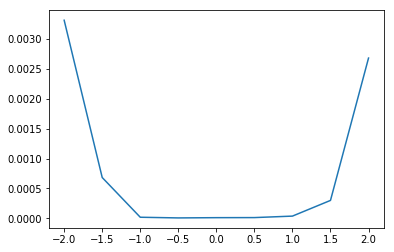

In [6]:
biases = (-2.0, -1.5, -1.0, -0.5, 0, 0.5, 1.0, 1.5, 2.0)
concentration_mean = []
concentration_std = []

for bias in biases:
    filters = cluster_utils.ArgFilter(bias=bias)
    data = []
    for stats in all_stats:
        if not filters.check(stats["args"]):
            continue
        # C is the coordinates of F* at F. 
        C = stats["data"][-1]["C"]
        # Check concentration with variance. 
        sorted_value, _ = C[:,:2].abs().sort(dim=0, descending=True)
        v = sorted_value[1, :].mean().item()      
        data.append(v)
        
    data = np.array(data)
    avg_value = np.median(data)
    std_value = np.std(data)    
    concentration_mean.append(avg_value)
    concentration_std.append(std_value)
    
concentration_mean = np.array(concentration_mean)
concentration_std = np.array(concentration_std)

plt.plot(biases, concentration_mean)
#plt.errorbar(biases, concentration_mean - concentration_std, concentration_mean + concentration_std)
        


tensor(4.5892e-11)
tensor([[ 7.9548e-05, -2.8448e-03, -1.2503e-04],
        [ 2.0420e-04, -7.2299e-03, -3.1660e-04],
        [ 1.0005e+00, -1.9582e-02, -8.5602e-04],
        [ 2.6558e-04, -9.4548e-03, -4.1354e-04],
        [ 4.8453e+00, -1.6991e+02, -7.4593e+00],
        [-7.6991e-05,  2.7754e-03,  1.2081e-04],
        [ 1.0726e-04, -3.8355e-03, -1.6771e-04],
        [ 1.4318e-04, -5.1034e-03, -2.2318e-04],
        [ 2.0105e-04, -7.1225e-03, -3.1153e-04],
        [ 1.6504e-04, -5.8342e-03, -2.5545e-04],
        [ 1.6214e-04, -5.7786e-03, -2.5265e-04],
        [ 1.5070e-04, -5.3747e-03, -2.3508e-04],
        [ 1.2967e-04, -4.6561e-03, -2.0359e-04],
        [ 1.9799e-04, -7.0753e-03, -3.0939e-04],
        [ 1.4933e-04, -5.3409e-03, -2.3355e-04],
        [ 2.0413e-04, -7.2647e-03, -3.1784e-04],
        [-4.8455e+00,  1.7091e+02,  7.4596e+00],
        [ 2.1955e-04, -7.8150e-03, -3.4181e-04],
        [ 2.3506e-04, -8.3848e-03, -3.6690e-04],
        [-3.6787e-04,  1.3389e-02,  5.8480e-04],
 

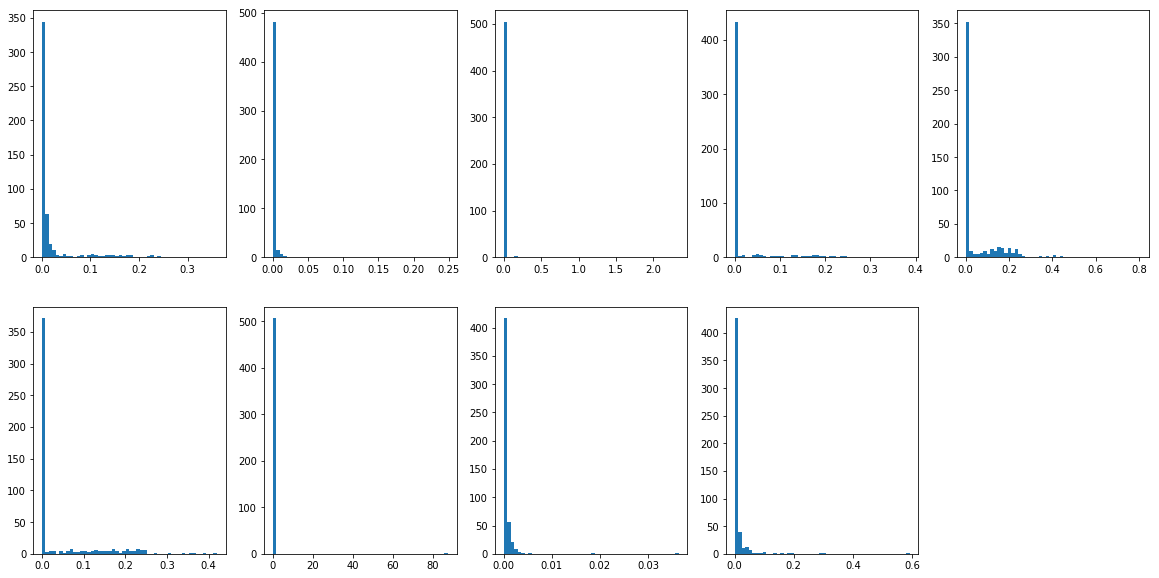

In [70]:
biases = (-2.0, -1.5, -1.0, -0.5, 0, 0.5, 1.0, 1.5, 2.0)

plt.figure(figsize=(20, 10))
x = 

for i, bias in enumerate(biases):
    plt.subplot(2, 5, i + 1)
    filters = cluster_utils.ArgFilter(bias=bias)
    data = []
    for stats in all_stats:
        if not filters.check(stats["args"]):
            continue
        C = stats["data"][-1]["C"]
        # Check concentration with variance. 
        # print(C[:,:2].abs())
        # break
        sorted_value, _ = C[:,:2].abs().sort(dim=0, descending=True)
        v = sorted_value[1, :].mean().item()  
        if v > 50:
            print(stats["data"][-1]["loss"])
            print(C)
        data.append(v)

    data = np.array(data)
    plt.hist(data, 50)
    # plt.axis([0, 1, 0, None])

In [7]:
C

tensor([[-7.9442e-05, -6.0496e-05, -3.1863e-06],
        [ 1.1874e-05, -1.0040e-04, -1.7019e-06],
        [-7.0058e-05, -1.3580e-04, -2.0309e-06],
        [-2.9994e-04, -1.2864e-04, -5.3346e-06],
        [-1.0926e-04, -2.0797e-04, -5.6579e-06],
        [ 9.9986e-01, -1.1728e-04, -5.1061e-06],
        [-7.7229e-05, -1.2028e-04, -2.7976e-06],
        [-1.0705e-04, -1.5815e-04, -3.7174e-06],
        [-6.4827e-05, -1.7858e-04, -3.1317e-06],
        [-2.8262e-05, -9.8567e-05, -2.4694e-06],
        [-6.1902e-06, -7.8327e-05, -2.2715e-06],
        [ 7.1303e-06, -1.6829e-04, -2.1364e-06],
        [ 5.3088e-05,  7.6387e-05, -3.2449e-06],
        [ 1.2562e-05, -1.5913e-04, -2.9703e-06],
        [ 9.9004e-05, -2.4607e-04, -3.8024e-06],
        [-1.2886e-04,  9.9989e-01, -5.2317e-06],
        [-8.4377e-05, -1.3602e-04, -3.3855e-06],
        [-4.7394e-05, -1.0533e-04, -3.7505e-06],
        [-5.8160e-05, -7.8071e-05, -3.1367e-06],
        [-1.1994e-05, -1.8557e-05, -2.7715e-06],
        [ 2.4306e-03

In [9]:
stats["args"]

Namespace(N=1000, bias=-1.5, cmdline='./two_layer_new.py --seed 987302 --bias -1.5 --save_dir /checkpoint/yuandong/jobs/theory_2layer2', data_std=1.5, lr=0.0001, m=2, multi=10, no_bias=False, num_iter=30000, print_iter=1000, save_dir='/checkpoint/yuandong/jobs/theory_2layer2', seed=987302, signature='071619_003230_155123', use_sgd=False)